# Group 10 - Homework 9 
## Group Members:
1.Mahajabin Mostafa   
2.Navya Madhuri Bagireddy  
3.Akshay Manoj  
4.Vinaika Maruvada

## Aim:

* To create clusters using K-means clustering, agglomerative clustering, and DBSCAN. Also, investigate the values of hyperparameters for each of these algorithms and quality of clustering solutions and to choose the best clustering solution.
* To plot the best clustering solution in 2-dimensions using pairs of attributes as well as PCA.
* To compare the best clustering solution labels with the original data labels in the column "wine".

## About the Dataset:


The dataset comprises 13 attributes related to wine characteristics, excluding the target variable "Wine". Here, unsupervised learning algorithms can be used to find patterns and connections among wines. The other attributes are-

1. **Alcohol:** A measure of wine strength, usually expressed as a percentage.
2. **Malic Acid:** Adds a tangy flavor and contributes to the wine's acidity.
3. **Ash:** Represents the amount of minerals left behind after burning, which is impacted by the makeup of the soil.
4. **Acl:** Possibly connected to acidity levels and how they affect the flavor character of the wine.
5. **Mg:** Stands for magnesium content, which may have an impact on flavor and health advantages.
6. **Phenols:** Add flavor, color, and health advantages.
7. **Flavanoids:** Phenolic compounds that have an impact on color, flavor, and antioxidant capabilities.
8. **Nonflavanoid Phenols:** Additional phenolic chemicals that impact the senses.
9. **Proanth:** Possibly proanthocyanidins that impart astringency and bitterness.
10. **Color Intensity:** A measure of color intensity that is dependent on aging and grape varietal.
11. **Hue:** Provides information about the age and varietal of the wine by reflecting its shade or color.
12. **Optical Density (OD):** Indicates how opaque or dark a wine is and is correlated with the intensity of its color.
13. **Proline:** Proline is an amino acid that varies depending on the type of grape and the growing environment.

## Methodology:

In [321]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [322]:
df=pd.read_csv('wine.csv')

In [323]:
df

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


There are no null values in the dataset.

In [325]:
df.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## Exploratory Data Analysis:

**Pair Plot**

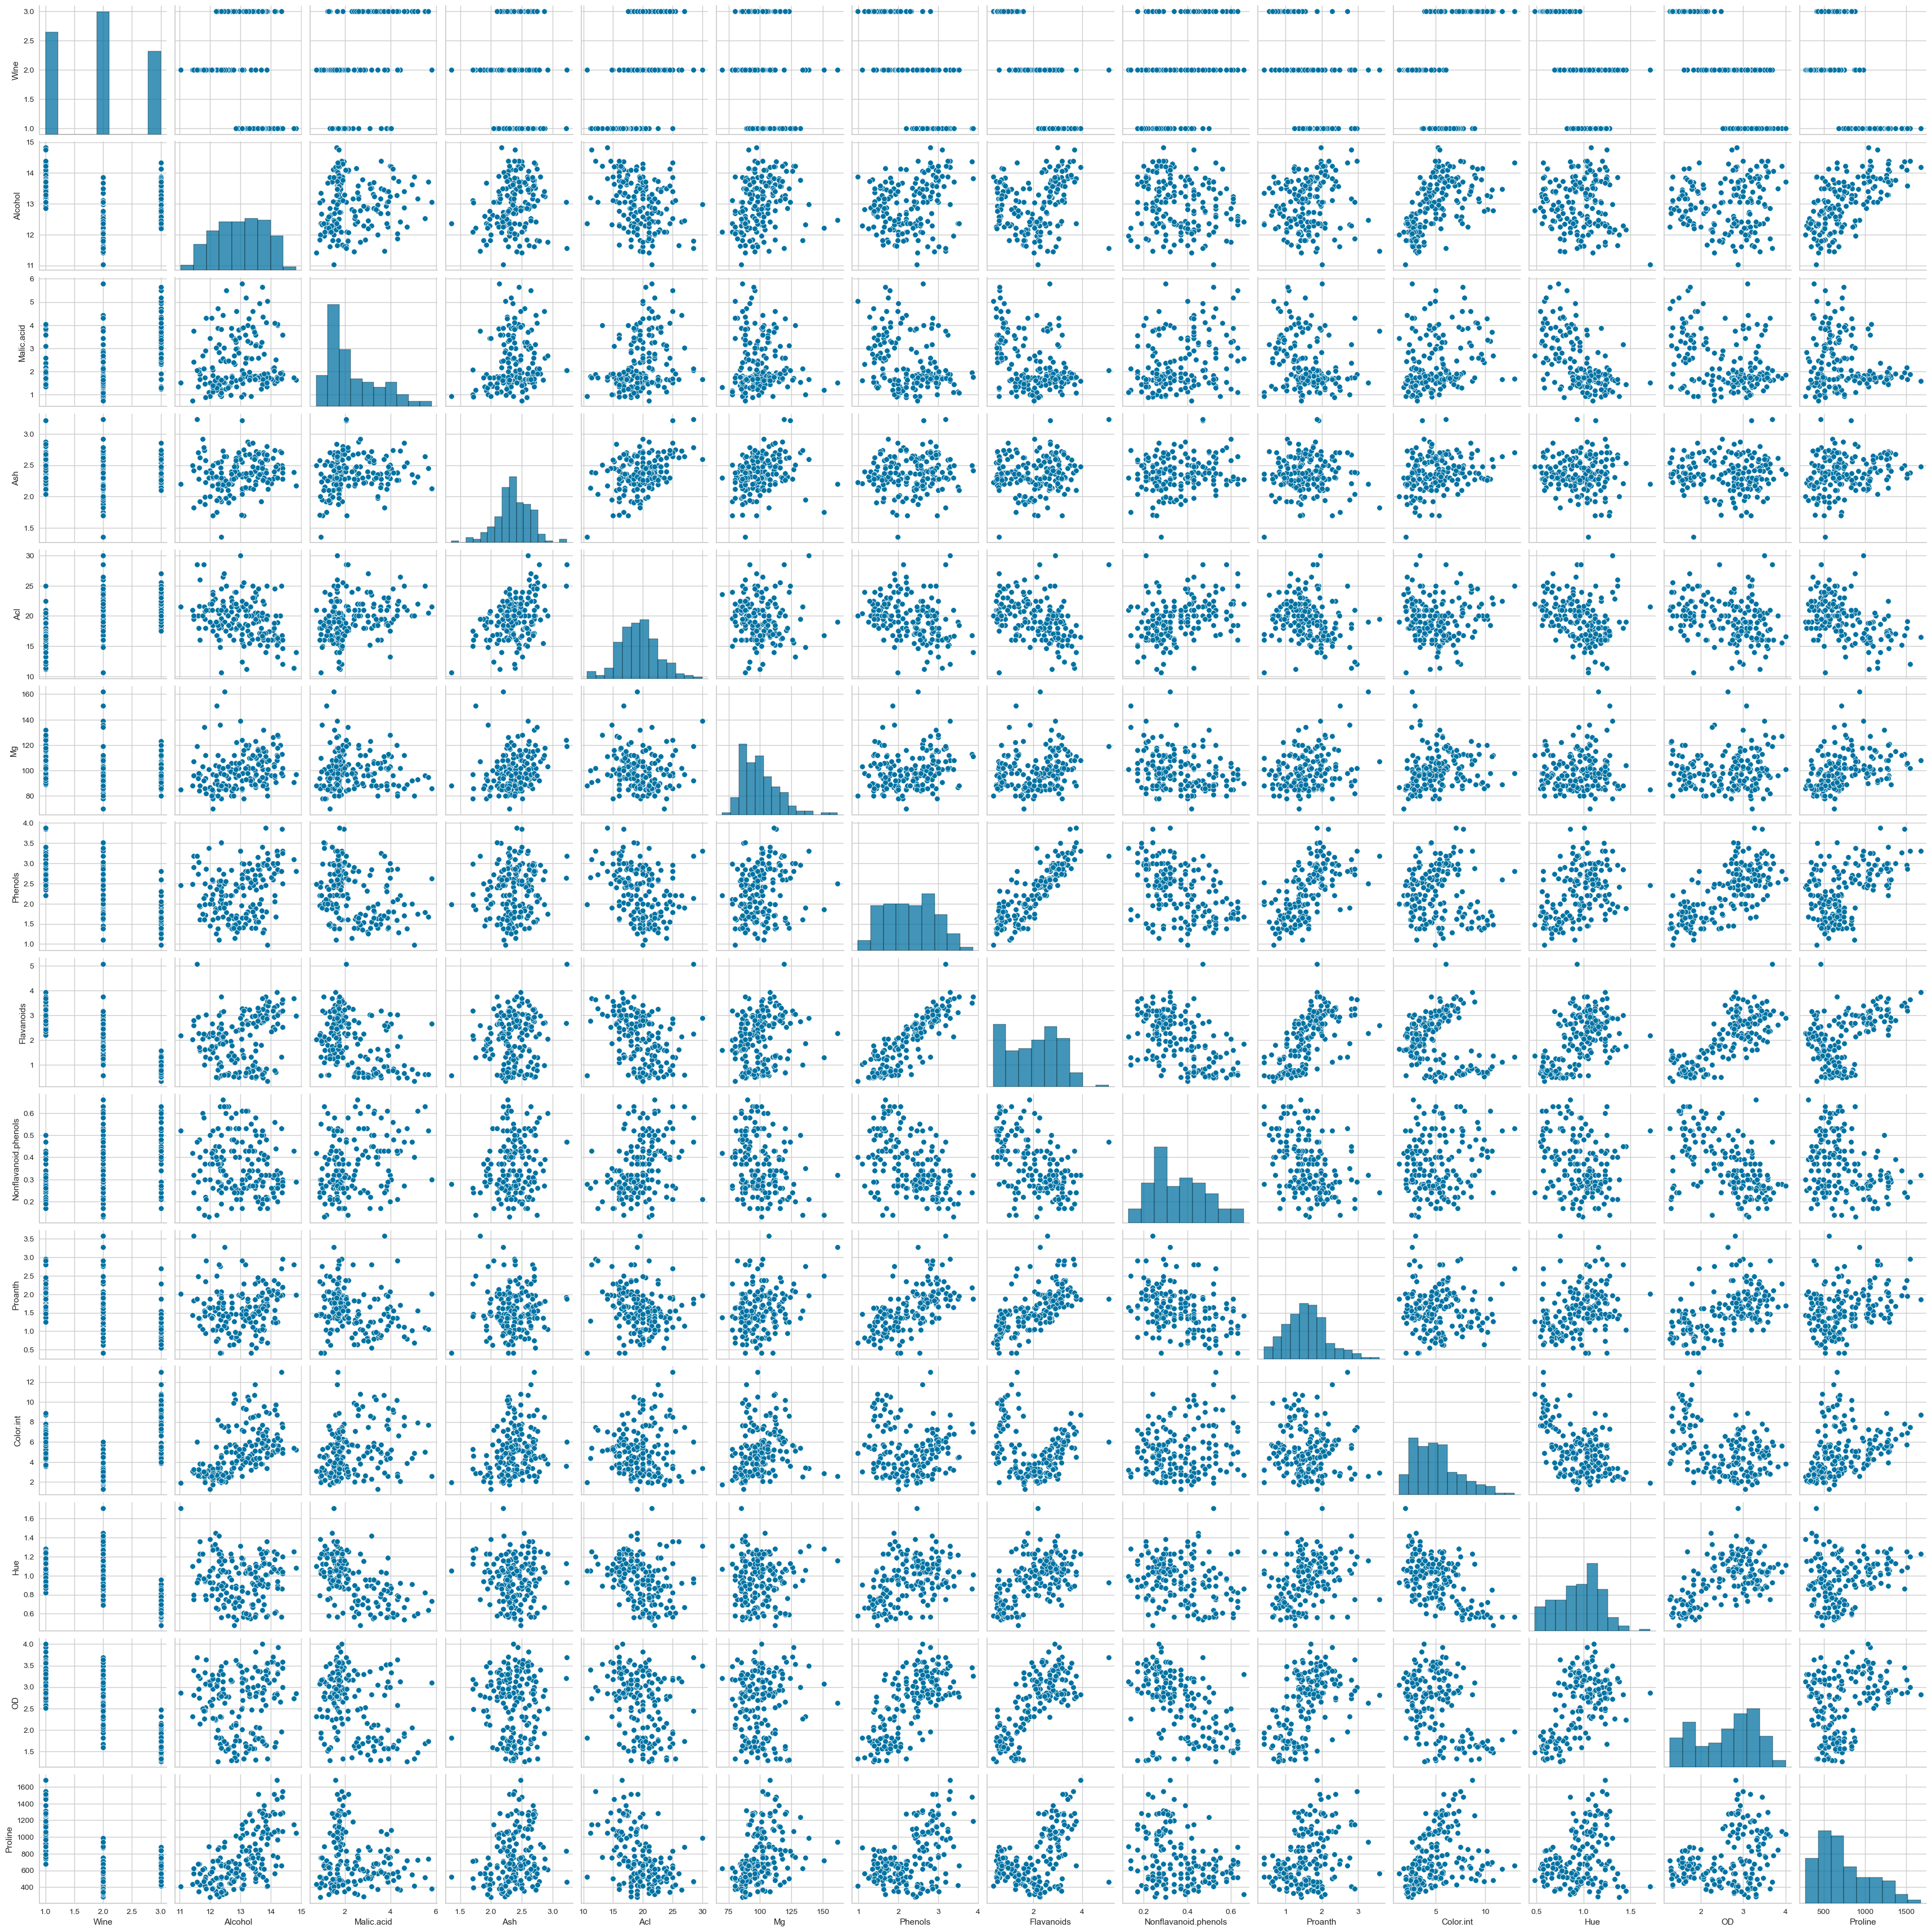

In [326]:
sns.pairplot(df)

Every scatterplot in the dataFrame 'df' compares two variables in pairs. Every graphic reveals the relationship between two variables and offers information about possible correlations and distributions between them.

**Correlation Matrix and Heat Map**

In [327]:
correlation_matrix = df.corr()
correlation_matrix

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
Wine,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic.acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Acl,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Mg,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid.phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanth,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


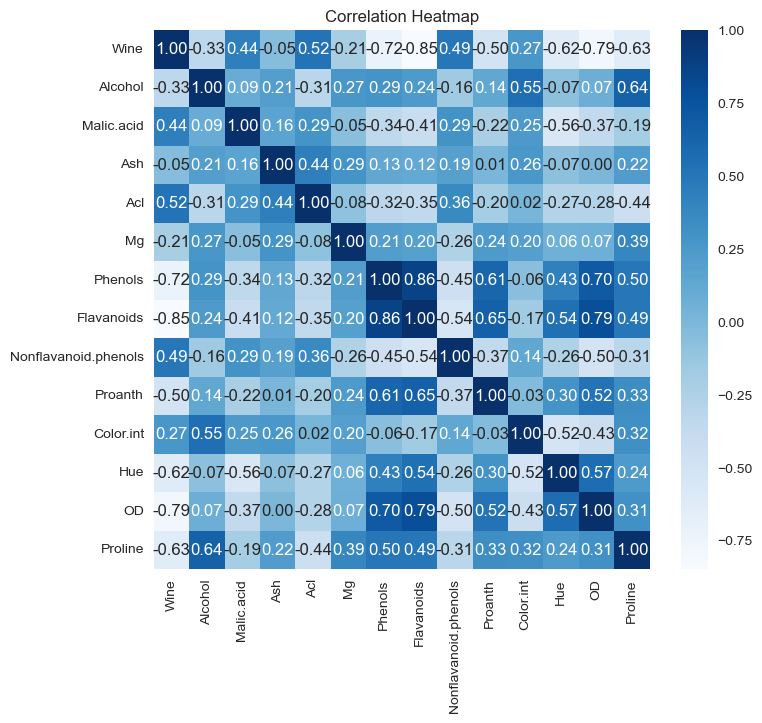

In [328]:
plt.figure(figsize=(8, 7))  
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Here, we used Seaborn to generate a heatmap that illustrates the correlation matrix—a common way to show the connections between the variables in a dataset. The 'Blues' colormap is used to show correlation strength; greater correlations are represented by darker colors. To facilitate interpretation, annotations are given to show correlation values within each cell.

**Box Plot**

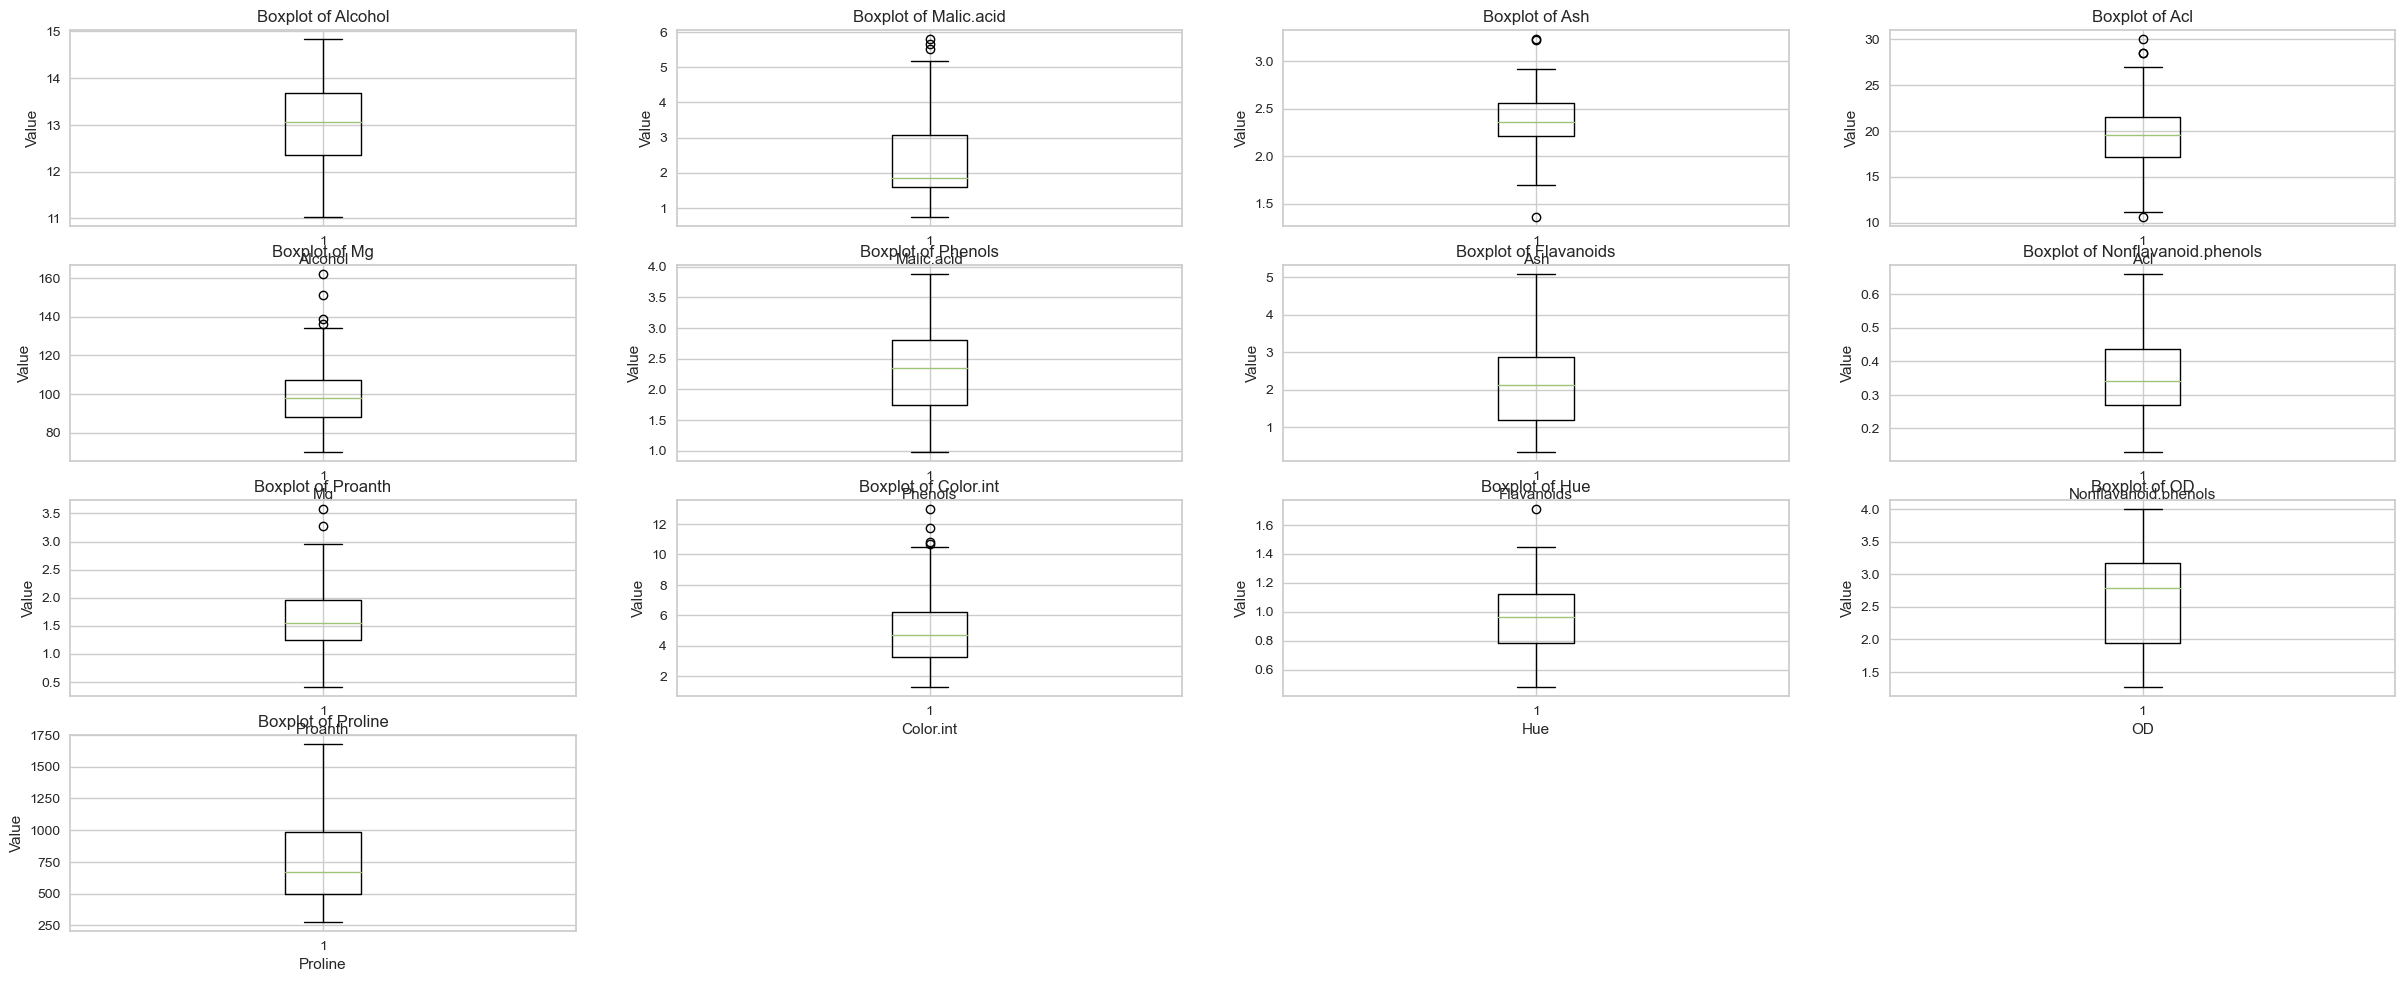

In [329]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 30))
plt.tight_layout(pad=3.0)

plt.subplot(10, 4, 1)
plt.boxplot(df['Alcohol'])
plt.title('Boxplot of Alcohol')
plt.xlabel('Alcohol')
plt.ylabel('Value')

plt.subplot(10, 4, 2)
plt.boxplot(df['Malic.acid'])
plt.title('Boxplot of Malic.acid')
plt.xlabel('Malic.acid')
plt.ylabel('Value')

plt.subplot(10, 4, 3)
plt.boxplot(df['Ash'])
plt.title('Boxplot of Ash')
plt.xlabel('Ash')
plt.ylabel('Value')

plt.subplot(10, 4, 4)
plt.boxplot(df['Acl'])
plt.title('Boxplot of Acl')
plt.xlabel('Acl')
plt.ylabel('Value')

plt.subplot(10, 4, 5)
plt.boxplot(df['Mg'])
plt.title('Boxplot of Mg')
plt.xlabel('Mg')
plt.ylabel('Value')

plt.subplot(10, 4, 6)
plt.boxplot(df['Phenols'])
plt.title('Boxplot of Phenols')
plt.xlabel('Phenols')
plt.ylabel('Value')

plt.subplot(10, 4, 7)
plt.boxplot(df['Flavanoids'])
plt.title('Boxplot of Flavanoids')
plt.xlabel('Flavanoids')
plt.ylabel('Value')

plt.subplot(10, 4, 8)
plt.boxplot(df['Nonflavanoid.phenols'])
plt.title('Boxplot of Nonflavanoid.phenols')
plt.xlabel('Nonflavanoid.phenols')
plt.ylabel('Value')

plt.subplot(10, 4, 9)
plt.boxplot(df['Proanth'])
plt.title('Boxplot of Proanth')
plt.xlabel('Proanth')
plt.ylabel('Value')

plt.subplot(10, 4, 10)
plt.boxplot(df['Color.int'])
plt.title('Boxplot of Color.int')
plt.xlabel('Color.int')
plt.ylabel('Value')

plt.subplot(10, 4, 11)
plt.boxplot(df['Hue'])
plt.title('Boxplot of Hue')
plt.xlabel('Hue')
plt.ylabel('Value')

plt.subplot(10, 4, 12)
plt.boxplot(df['OD'])
plt.title('Boxplot of OD')
plt.xlabel('OD')
plt.ylabel('Value')

plt.subplot(10, 4, 13)
plt.boxplot(df['Proline'])
plt.title('Boxplot of Proline')
plt.xlabel('Proline')
plt.ylabel('Value')


plt.show()


This code shows the distribution of values for each wine feature by creating a grid of boxplots for each attribute in the dataset. A distinct property, such as  alcohol content, malic acid levels, and phenolic compounds, is represented by each subplot. Boxplots offer a graphic representation of the data's distribution, central tendency, and possible outliers. With a quick scan, this visualization provides insights into the range and distribution of wine qualities by highlighting any changes or trends across the dataset.

In [330]:
df_clustering = df.drop("Wine", axis=1)
df_clustering.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


**Scaling**

We will perform scaling before performing k-means clustering, as it involves complex computaions like distance fucntions. So its important for the data to be scaled.

In [331]:
from sklearn.preprocessing import MinMaxScaler #importing MinMaxScaler from sklearn

# Initialize MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(df_clustering)
scaled_data = scaler.transform(df_clustering)
scaled_data

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

For feature scaling, we have imported the MinMaxScaler. It sets the starting values of the scaler MinMaxScaler object. After that, the data is transformed using the determined scaling parameters by fitting the scaler to the data. Each feature is guaranteed to be scaled to a particular range (usually between 0 and 1) by the result, which is saved in scaled_data, which also contains the scaled features.

In [332]:
scaled_df = pd.DataFrame(scaled_data, columns=df_clustering.columns)
scaled_df.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


### Create clusters using K-means clustering, agglomerative clustering, and DBSCAN. Investigate the values of hyperparameters for each of these algorithms and quality of clustering solutions. Choose the best clustering solution.



## Model 1: K-means clustering:

**Elbow Method to deterimine the value of k**

In [333]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

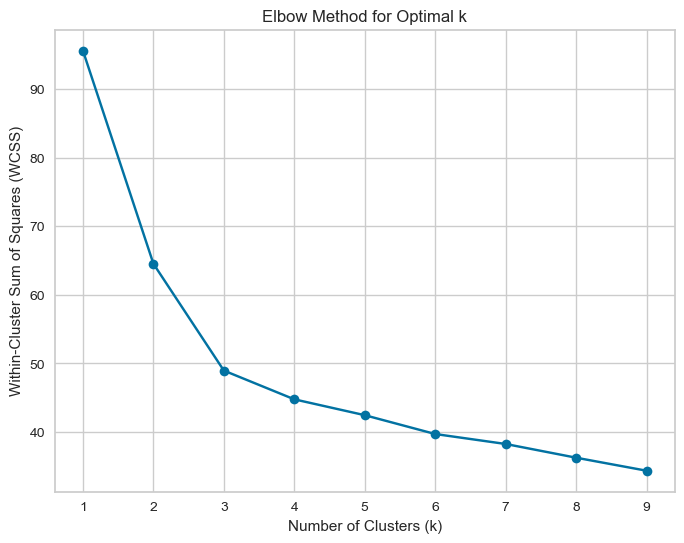

In [334]:
from sklearn.cluster import KMeans

# Define the range of k values to try
k_values = range(1, 10)
wcss_values = []  # To store the within-cluster sum of squares (WCSS) for each k

# Calculate WCSS for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    wcss_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

This determines the ideal number of clusters (k) for K-means clustering by applying the "Elbow Method". In the given range, the within-cluster sum of squares (WCSS) is computed for every value of k. The "elbow" point, or the point at which the rate of reduction in WCSS slows down, is then seen by plotting the WCSS values against the associated k values. This figure represents the ideal number of clusters.

We can choose k = 3 since we can see that the change in inertia slows down after that.

**Building k-means clustering with k=3**

In [335]:
from sklearn.metrics import accuracy_score

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_df)

KMeans(n_clusters=3, random_state=42)

In [336]:
cluster = kmeans.predict(scaled_df)
cluster

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [337]:
scaled_df['Cluster'] = cluster

In [338]:
scaled_df

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Cluster
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,2
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,2
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,2
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,2
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529,1
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662,1
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290,1
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856,1


In [339]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [340]:
kmeans.cluster_centers_

array([[0.31137521, 0.23689915, 0.47291703, 0.49991686, 0.2477209 ,
        0.45305895, 0.38240098, 0.4117468 , 0.39742546, 0.14773478,
        0.47351167, 0.58897554, 0.15640099],
       [0.544689  , 0.47844053, 0.56013612, 0.53833177, 0.31146245,
        0.24476489, 0.10713464, 0.61852487, 0.22827646, 0.4826404 ,
        0.19254989, 0.16090576, 0.24739982],
       [0.70565142, 0.24842869, 0.58490401, 0.3444313 , 0.41072701,
        0.64211419, 0.55467939, 0.30034024, 0.47727155, 0.35534046,
        0.47780888, 0.69038612, 0.59389397]])

In [341]:
kmeans.inertia_

48.96051713667649

In [342]:
silhouette_samples(scaled_data, kmeans.labels_)

array([ 0.4639191 ,  0.31167217,  0.40591247,  0.47433348,  0.18342835,
        0.51598769,  0.47488791,  0.45643415,  0.43683474,  0.4646615 ,
        0.49324138,  0.40006894,  0.45805713,  0.37153715,  0.44888317,
        0.47090904,  0.47764748,  0.41711098,  0.46147018,  0.37175871,
        0.40587845,  0.14548751,  0.38360525,  0.2253115 ,  0.24043579,
        0.09865174,  0.41472371,  0.28861962,  0.37836248,  0.41360213,
        0.41358991,  0.48182682,  0.29337268,  0.34055427,  0.36467793,
        0.36195877,  0.28268418,  0.24898226,  0.18760407,  0.3389984 ,
        0.38563057,  0.20820789,  0.46017174,  0.10278347,  0.30949237,
        0.36011611,  0.43534951,  0.44704188,  0.45563174,  0.48978754,
        0.32059614,  0.4585872 ,  0.46520646,  0.4851417 ,  0.44915432,
        0.43921736,  0.48911152,  0.47253453,  0.47957819,  0.08778678,
        0.04721501,  0.15912019,  0.09088211,  0.07933828,  0.22290706,
        0.09345432, -0.0320215 ,  0.25431125,  0.05796672,  0.02

In [343]:
silhouette_score(scaled_data, kmeans.labels_)

0.3008938518500134

We have shown the silhouette score, which evaluates the caliber of clustering algorithms. The silhouette score in this instance after using k-means clustering is roughly 0.30 which denotes a modest level of cohesiveness and separation between the clusters.

In [344]:
#pip install yellowbrick 

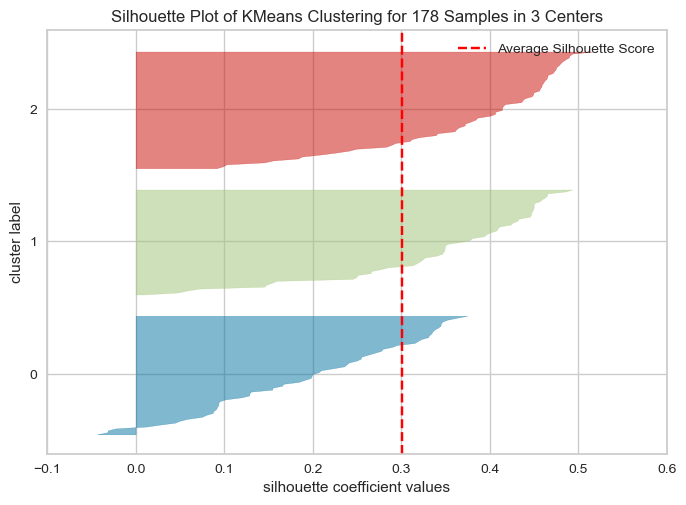

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 178 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [345]:
from yellowbrick.cluster import SilhouetteVisualizer


# Create silhouette visualizer
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

# Fit the visualizer
visualizer.fit(scaled_data)

# Show the plot
visualizer.show()


Here, we visualized the silhouette scores of the clusters produced by the KMeans model using the SilhouetteVisualizer from the Yellowbrick package. It is possible to evaluate the quality of clustering on data that has not yet been observed by fitting the visualizer to the scaled data. Higher scores suggest stronger cluster separation and cohesion. The silhouette coefficients for each sample are displayed in the resulting figure. Understanding the clustering structure and assessing the KMeans algorithm's performance on the test dataset are made easier with the help of this representation.

## Model 2: Agglomerative Clustering

In [346]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import cophenet, linkage, dendrogram
from scipy.spatial.distance import pdist

In [347]:
# we are choosing ward linkage and euclidean distance to implement agglomerative clustering
agg_cluster1 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
agg_cluster1.fit_predict(scaled_data)

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 4, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 3, 3, 3, 4,
       4, 4, 4, 4, 3, 3, 4, 4, 4, 4, 3, 4, 3, 3, 3, 3, 4, 3, 3, 4, 4, 3,
       4, 4], dtype=int64)

In [348]:
silhouette_score(scaled_data, agg_cluster1.labels_)

0.20415379209163975

**Lets now look at the dendogram to decide the value of no.of clusters.**

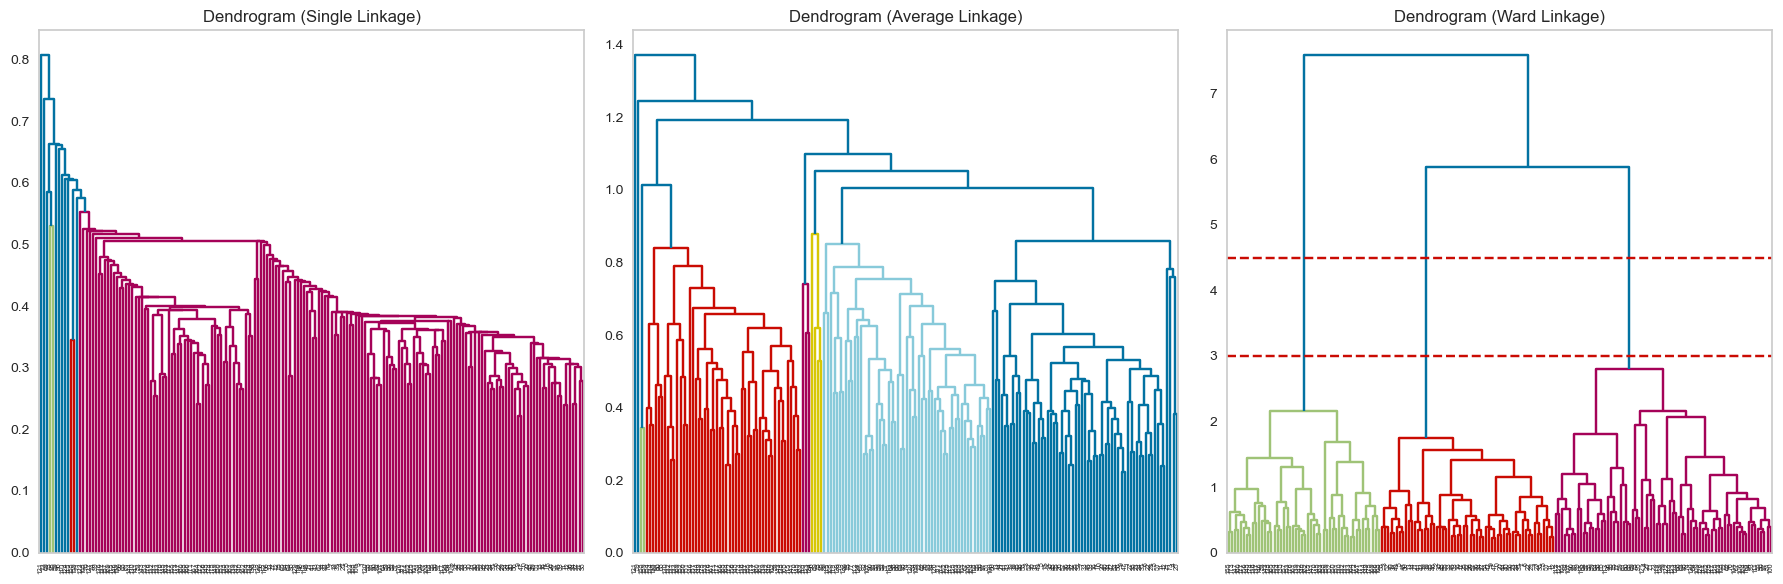

In [349]:
# Define figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot dendrograms for different linkage methods
methods = ['single', 'average', 'ward']
for i, method in enumerate(methods):
    ax = axes[i]
    dendrogram(linkage(scaled_data, method=method), ax=ax)
    ax.set_title(f'Dendrogram ({method.capitalize()} Linkage)')
    ax.axhline(y=3, color='r', linestyle='--')
    ax.axhline(y=4.5, color='r', linestyle='--')
    ax.grid()

plt.tight_layout()
plt.show()

Dendogram with ward linkage looks better w.r.t distances and clusters. So we will proceed with that in the further analysis.

In [350]:
# we are choosing ward linkage and euclidean distance to implement agglomerative clustering
agg_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
agg_cluster.fit_predict(scaled_data)

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [351]:
silhouette_score(scaled_data, agg_cluster.labels_)

0.2948290632158541

We have shown the silhouette score, which evaluates the caliber of clustering algorithms. The silhouette score in this instance after using Agglomerative clustering is roughly 0.29, which denotes a modest level of cohesiveness and separation between the clusters.

The cophenetic coefficient gives correlation between the distances of data points in the feature space and their distances on the dendogram.

In [352]:
cophenet(linkage(scaled_data, metric='euclidean', method='ward'), pdist(scaled_data))

(0.703398741402486,
 array([1.15194018, 1.41532643, 1.75539899, ..., 2.16683486, 2.16683486,
        1.44734335]))

In [353]:
## To compare k-means and agglomertaive clustering we will look at continegncy matrix

contingency_matrix(kmeans.labels_, agg_cluster.labels_)

array([[62,  0,  0],
       [ 5, 50,  0],
       [ 4,  0, 57]], dtype=int64)

On comparing, k-means and agglomerativ clustering, we can see that 5+4 = 9, points fell in different clusters.

## Model 3: DB Scan

In [355]:
# For isntance lets consider epsilon = 0.4, and min_samples = 10 and implement DBSCAN
dbscan1 = DBSCAN(eps=0.4, min_samples=10)
# Fit the clustering algorithms on the data
dbscan1.fit(scaled_data)

DBSCAN(eps=0.4, min_samples=10)

In [356]:
silhouette_score(scaled_data, dbscan1.labels_)

0.15314791236384115

Now, lets build a DBSCAN clustering algorithm by choosing optimal values of epsilon and min_samples.

### Finding Optimal values for eps and min_sample for DBScan

Also lets take the value of min_samples as 14 (d+1) and value of n_neighbors as 13 (min_Samples -1)

In [357]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=13)
nbrs = neigh.fit(scaled_data)
distances, indices = nbrs.kneighbors(scaled_data)

In [358]:
indices

array([[  0,  20,  56, ...,  47,  42,  35],
       [  1,  38,  29, ...,  12,  47,   6],
       [  2,  55,  48, ...,  40,  26,  44],
       ...,
       [175, 149, 166, ..., 173, 164, 147],
       [176, 153, 175, ..., 164, 167, 163],
       [177, 156, 174, ..., 168, 153, 164]], dtype=int64)

In [359]:
distances

array([[0.        , 0.26963979, 0.32888704, ..., 0.46179675, 0.49588822,
        0.50067153],
       [0.        , 0.38370121, 0.41740418, ..., 0.48676416, 0.50726579,
        0.50786269],
       [0.        , 0.38095169, 0.38269437, ..., 0.49147919, 0.50022289,
        0.5056447 ],
       ...,
       [0.        , 0.36742079, 0.37848678, ..., 0.51583788, 0.53055421,
        0.53510201],
       [0.        , 0.39493366, 0.39924775, ..., 0.5089636 , 0.5229944 ,
        0.54251094],
       [0.        , 0.39335651, 0.43133701, ..., 0.54312496, 0.55076107,
        0.55899803]])

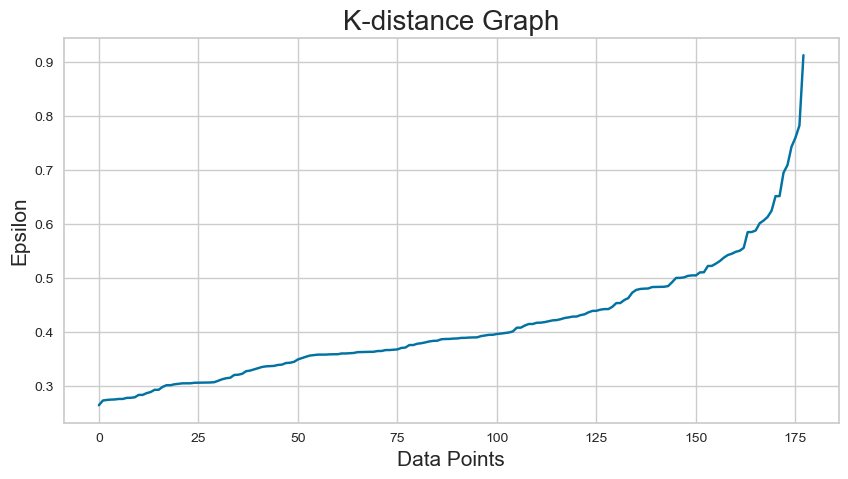

In [360]:
dist = np.sort(distances[:,2])
plt.figure(figsize=(10,5))
plt.plot(dist)
plt.title("K-distance Graph",fontsize=20)
plt.xlabel("Data Points",fontsize=15)
plt.ylabel("Epsilon",fontsize=15);

From the above k-distance graph, lets take the elbow values which is approximately 0.55 as the value of epsilon.

In [361]:
# Initialize the clustering algorithms with chosen hyperparameters
dbscan = DBSCAN(eps=0.55, min_samples=14)
# Fit the clustering algorithms on the training data
dbscan.fit(scaled_data)

DBSCAN(eps=0.55, min_samples=14)

In [362]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  1,  0,  0,  0,  0,  0,  0,
       -1, -1,  0, -1,  0, -1, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0, -1,  0,  0,  1,
        0,  0, -1, -1, -1, -1,  0,  0,  0,  0,  0, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1], dtype=int64)

In [363]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1], dtype=int64), array([ 21, 110,  47], dtype=int64))

3 clusters were formed for epsilon = 0.55 and min_samples =14.

In [364]:
# dbscan.core_sample_indices_
len(dbscan.core_sample_indices_)

92

In [365]:
silhouette_score(scaled_data, dbscan.labels_)

0.22493130069971373

We have shown the silhouette score, which evaluates the caliber of clustering algorithms. The silhouette score in this instance after using DB Scan clustering is roughly 0.22, which denotes a modest level of cohesiveness and separation between the clusters.

In [367]:
contingency_matrix(kmeans.labels_,dbscan.labels_)

array([[14, 48,  0],
       [ 5,  3, 47],
       [ 2, 59,  0]], dtype=int64)

On comparing, k-means and DBSCAN clustering, we see that around 10 points, fell into different clusters.

We see that all the 3 models, gave us three clusters for the wine dataset. 
* For Model 1, the Silhouette score is 0.30, using k-means clustering.
* For Model 2, the Silhoutte score is 0.29, using Agglomerative clustering
* For Model 3, the Silhotte score is 0.22, using DBSCAN clustering.

Since, the silhouette score for k-means clustering is higher than agglomerative and DBScan, lets procees with k-means.

### Plot the best clustering solution in 2-dimensions using pairs of attributes as well as PCA.

**Lets use few pairs of attributes from our dataset and plot k-means clustering on it.**

1. Selecting a pair of columns "Alcohol" and "Ash" from scaled data

In [368]:
df1 = scaled_df[["Alcohol", "Ash"]]
df1.head()

,Alcohol,Ash
0,0.842105,0.572193
1,0.571053,0.417112
2,0.560526,0.700535
3,0.878947,0.609626
4,0.581579,0.807487


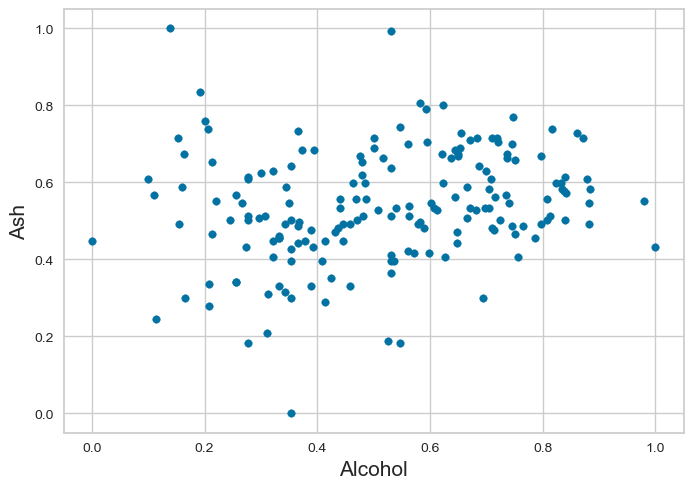

In [369]:
plt.scatter(df1['Alcohol'], df1['Ash'], s=30)
plt.xlabel('Alcohol', fontsize=15)
plt.ylabel('Ash', fontsize=15);

With the 'Ash' values on the y-axis and the 'Alcohol' values from DataFrame df1 on the x-axis, this code generates a scatter plot. A combination of the dataset's "Alcohol" and "Ash" values is represented by each point on the plot. The markers' size is determined by the's=30' option. The plot becomes more accessible and instructive by clearly naming the axes and designating the font size, which helps with the interpretation of the dataset's alcohol and ash content relationship.

In [370]:
kmeans.fit(df1)

KMeans(n_clusters=3, random_state=42)

In [371]:
cluster = kmeans.predict(df1)
cluster

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 2, 2,
       0, 0, 1, 0, 0, 1, 1, 1, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2,
       2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 2, 1, 2, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 2, 1, 1,
       0, 1, 1, 2, 1, 1, 2, 1, 2, 0, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 1, 1,
       1, 1])

In [372]:
df1['Cluster'] = cluster
df1

,Alcohol,Ash,Cluster
0,0.842105,0.572193,1
1,0.571053,0.417112,0
2,0.560526,0.700535,1
3,0.878947,0.609626,1
4,0.581579,0.807487,1
...,...,...,...
173,0.705263,0.582888,1
174,0.623684,0.598930,1
175,0.589474,0.481283,1
176,0.563158,0.540107,1


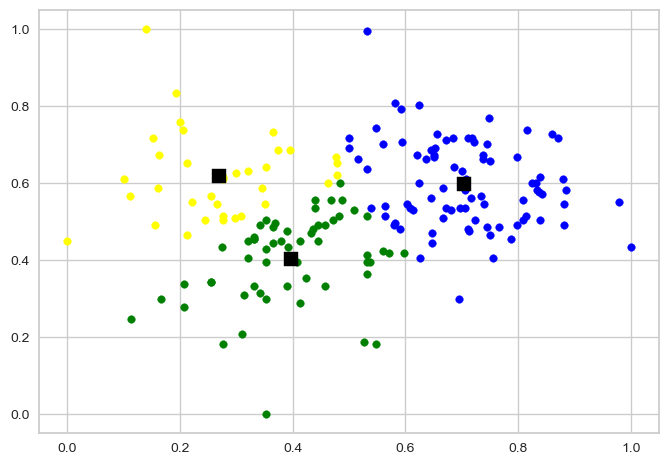

In [373]:
labels = [0, 1, 2]
colors = ["green", "blue", "yellow"]

for label, color in zip(labels, colors):
    index = df1["Cluster"]==label
    plt.scatter(df1.loc[index, "Alcohol"],
                df1.loc[index, "Ash"],
                c = color,
                s=30)
    
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color="black", marker="s", s=100);

Here we have used predetermined labels and related colors to show clustered data points by giving each cluster a unique color. Plotting the data points associated with each cluster with their corresponding colors, iteratively goes through each label-color pair. It also uses black squares to indicate the centroids of the clusters found by the KMeans method, which improves the visualization of cluster centers among the dispersed data points. All things considered, it offers a distinct visual depiction of the distribution of clustered data and the centroids inside the feature space.

2. Selecting a pair of columns "Acl" and "Mg" from scaled data

In [374]:
df2 = scaled_df[["Acl", "Mg"]]
df2.head()

,Acl,Mg
0,0.257732,0.619565
1,0.030928,0.326087
2,0.412371,0.336957
3,0.319588,0.467391
4,0.536082,0.521739


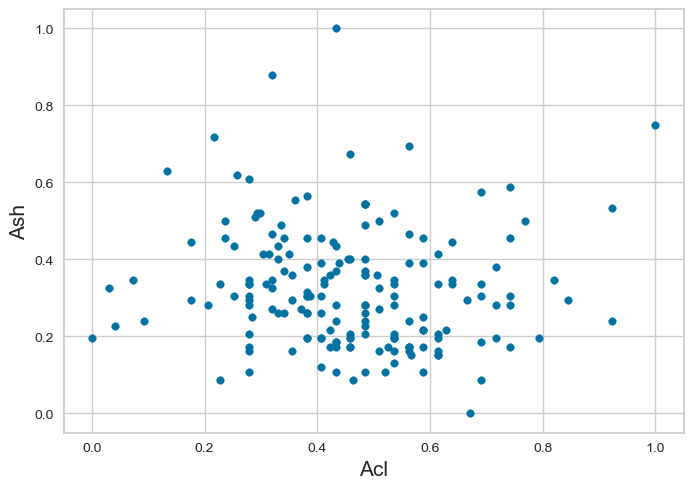

In [375]:
plt.scatter(df2['Acl'], df2['Mg'], s=30)
plt.xlabel('Acl', fontsize=15)
plt.ylabel('Ash', fontsize=15);

The 'Acl' values from DataFrame df2 are shown on the x-axis of the scatter plot created by this code, while the 'Mg' values are represented on the y-axis. A combination of the dataset's "Acl" and "Mg" values is represented by each point on the plot. The markers' size is determined by the's=30' option. The figure is made more accessible and informative by clearly naming the axes and designating the font size. This makes it easier to grasp the link between the Acl and Mg content in the dataset.

In [376]:
kmeans.fit(df2)

KMeans(n_clusters=3, random_state=42)

In [377]:
cluster = kmeans.predict(df2)
cluster

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 0, 2, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 2, 0, 0, 0, 2, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 2, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 2, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2,
       2, 0])

In [378]:
df2['Cluster'] = cluster
df2

,Acl,Mg,Cluster
0,0.257732,0.619565,1
1,0.030928,0.326087,1
2,0.412371,0.336957,1
3,0.319588,0.467391,1
4,0.536082,0.521739,2
...,...,...,...
173,0.510309,0.271739,0
174,0.639175,0.347826,0
175,0.484536,0.543478,2
176,0.484536,0.543478,2


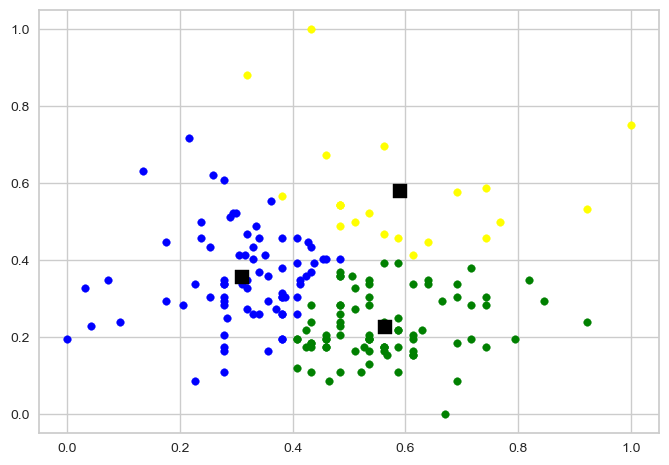

In [379]:
labels = [0, 1, 2]
colors = ["green", "blue", "yellow"]

for label, color in zip(labels, colors):
    index = df2["Cluster"]==label
    plt.scatter(df2.loc[index, "Acl"],
                df2.loc[index, "Mg"],
                c = color,
                s=30)
    
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color="black", marker="s", s=100);

In order to represent each cluster, it first iterates over each cluster label (0, 1, and 2) and gives each one a color (green, blue, or yellow). The data points for each cluster are then plotted in the feature space created by the values of "Acl" (alcohol) and "Mg" (magnesium) from DataFrame df2.

Black squares designate the centroids of the clusters, which were determined using the KMeans algorithm and offer a convenient point of reference for each cluster's center. Understanding the clustering of the wines according to their alcohol and magnesium content is made easier by this representation, which also provides information on any possible patterns or variations between groups.

**Performing principle component analysis to get a 2-D data**

In [380]:
from sklearn.decomposition import PCA
from sklearn import preprocessing  

In [381]:
features = ['Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols', 'Flavanoids','Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue', 'OD', 'Proline']

In [382]:
pca = PCA()    

pca.fit(scaled_data)

PCA()

**Find the percentage of variance along each PC**

In [383]:
per_var = np.round(pca.explained_variance_ratio_*100, 2)
per_var

array([40.75, 18.97,  8.56,  7.43,  5.57,  4.66,  3.66,  2.41,  2.27,
        2.25,  1.38,  1.27,  0.82])

The first two components explain almost 60% of the variation of our data. We'll use only PC1 and PC2, so we'll reduce the dimensionality of our data from 13 original dimensions to 2 dimensions.



**Scree Plot**

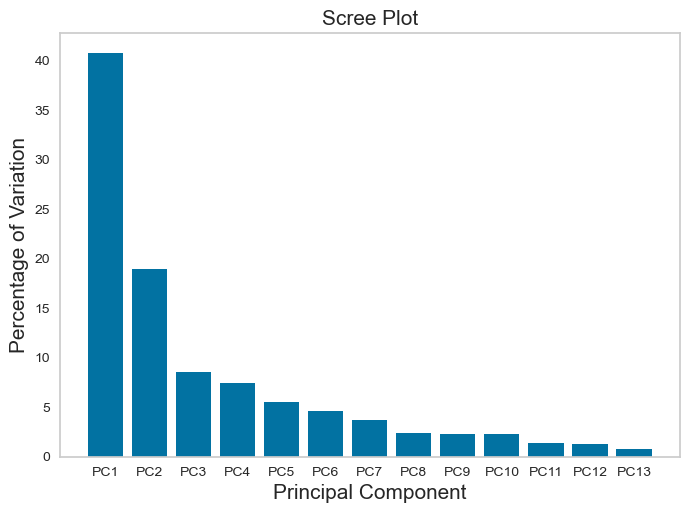

In [384]:
princ_comp = ['PC' + str(x) for x in range(1, 14)]

plt.bar(x = range(1, 14), height = per_var, tick_label = princ_comp)
plt.xlabel('Principal Component', fontsize = 15)
plt.ylabel('Percentage of Variation', fontsize = 15)
plt.title('Scree Plot', fontsize = 15)
plt.grid();

Here, we created a scree plot, a popular principle Component Analysis (PCA) visualization that shows the percentage of variation that each principle component accounts for.

It produces a bar plot with the principal components (PC1 through PC13) on the x-axis and the percentage of variance explained by each component on the y-axis.

The plot is made more instructive by giving each axe a precise description and a title. Furthermore, the grid lines facilitate the visualization of data points, offering a clearer picture of each principal component's contribution to the dataset's total variance.

In [385]:
pd.DataFrame(data = pca.components_, columns = princ_comp, index = features)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Alcohol,-0.133368,0.248516,-0.000739,0.177839,-0.088657,-0.395071,-0.414590,0.333109,-0.252902,0.092329,-0.251137,-0.473492,-0.286862
Malic.acid,-0.550884,-0.227391,-0.163091,0.079776,-0.188166,-0.074145,-0.001007,-0.009960,-0.031418,-0.519707,0.237206,0.215562,-0.443888
Ash,-0.083848,0.492039,0.403009,0.477242,0.006551,0.253065,0.196105,0.285982,0.228342,-0.033100,-0.106589,0.297776,-0.151968
Acl,-0.040328,0.486032,-0.241976,-0.081694,0.015880,-0.052643,-0.027033,-0.709095,0.076574,-0.026322,-0.352498,0.082062,-0.229793
Mg,-0.278010,-0.412890,0.286394,0.418305,0.470899,-0.018030,0.002573,-0.360038,0.148666,0.200582,-0.077162,-0.263396,-0.076556
Phenols,-0.137254,-0.213103,-0.300965,-0.135610,-0.312519,0.283604,0.147045,0.197232,0.503115,0.388032,-0.283041,-0.167278,-0.276349
Flavanoids,-0.275352,0.310302,-0.171805,-0.297556,0.520419,-0.066524,-0.050698,0.214889,0.466207,-0.212596,0.193315,-0.224561,0.188372
Nonflavanoid.phenols,0.555031,-0.076928,-0.123460,0.270756,-0.019937,-0.413384,-0.156461,-0.034232,0.483470,-0.036924,0.295372,0.102303,-0.260229
Proanth,0.326687,-0.014471,-0.044362,-0.204924,0.471910,0.351232,0.088960,0.122889,-0.284054,-0.023708,0.068775,-0.060197,-0.624839
Color.int,-0.035912,-0.237073,-0.056899,-0.132503,0.325868,-0.263006,-0.199445,0.236775,0.018743,0.039143,-0.534248,0.602194,0.023829


In [386]:
pca_data = pca.transform(scaled_data)

pca_df = pd.DataFrame(pca_data, columns = princ_comp)

pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,-0.706336,-0.253193,0.024093,0.013263,-0.026580,-0.074364,0.065172,0.138519,0.118627,0.277443,0.049711,-0.020012,-0.008723
1,-0.484977,-0.008823,-0.280482,0.075898,-0.238634,-0.071877,0.000686,-0.181193,0.028066,0.114948,0.074158,-0.050838,-0.005249
2,-0.521172,-0.189187,0.196217,-0.015784,0.045045,0.087116,0.125605,0.023178,-0.222133,-0.017270,0.012131,-0.104184,-0.023164
3,-0.821644,-0.580906,0.081110,0.012235,-0.004805,0.081987,-0.068418,-0.152253,-0.009376,0.061897,-0.090261,0.103306,-0.052921
4,-0.202546,-0.059467,0.300240,-0.102051,0.105777,-0.116790,0.057188,-0.009455,0.149605,-0.003043,-0.019021,-0.084094,-0.034172
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.739510,-0.471901,0.209360,0.149727,-0.291769,-0.083834,0.090191,-0.009818,-0.003105,-0.050829,0.043147,0.033437,-0.019795
174,0.581781,-0.348366,0.083590,0.075226,0.050316,-0.025295,0.048014,0.047284,-0.047386,-0.081414,-0.050335,0.051438,-0.032272
175,0.626313,-0.546857,-0.030495,0.170137,0.073738,0.031703,0.186334,-0.037139,-0.001465,0.073544,0.131167,0.111606,0.038913
176,0.572991,-0.425516,-0.094537,-0.137393,0.150559,0.112254,0.148922,-0.024662,0.011399,0.196597,0.030275,0.057329,0.011031


In [387]:
# Delete columns PC3 to PC13
columns_to_delete = ['PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13']
for col in columns_to_delete:
    del pca_df[col]

In [388]:
pca_df


,PC1,PC2
0,-0.706336,-0.253193
1,-0.484977,-0.008823
2,-0.521172,-0.189187
3,-0.821644,-0.580906
4,-0.202546,-0.059467
...,...,...
173,0.739510,-0.471901
174,0.581781,-0.348366
175,0.626313,-0.546857
176,0.572991,-0.425516


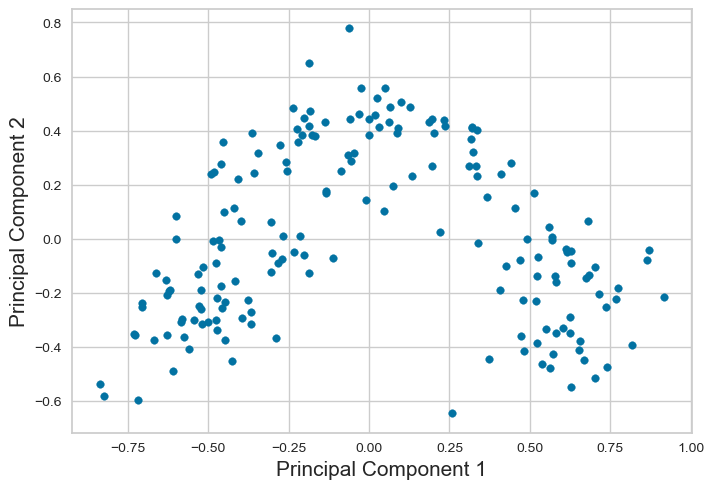

In [389]:
plt.scatter(pca_df['PC1'], pca_df['PC2'], s=30)
plt.xlabel('Principal Component 1', fontsize=15)
plt.ylabel('Principal Component 2', fontsize=15);

It generates a scatter plot from the DataFrame pca_df, with the values of the first principal component (PC1) and the second principal component (PC2) represented on the x- and y-axes, respectively. A data sample is represented by each point on the plot and is projected onto the two main components.

Using our best model i.e. the k-means clustering model to plot in 2 -dimensions after PCA.

In [390]:
kmeans.fit(pca_df)

KMeans(n_clusters=3, random_state=42)

In [391]:
cluster = kmeans.predict(pca_df)
cluster

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [392]:
pca_df['Cluster'] = cluster
pca_df

,PC1,PC2,Cluster
0,-0.706336,-0.253193,2
1,-0.484977,-0.008823,2
2,-0.521172,-0.189187,2
3,-0.821644,-0.580906,2
4,-0.202546,-0.059467,2
...,...,...,...
173,0.739510,-0.471901,1
174,0.581781,-0.348366,1
175,0.626313,-0.546857,1
176,0.572991,-0.425516,1


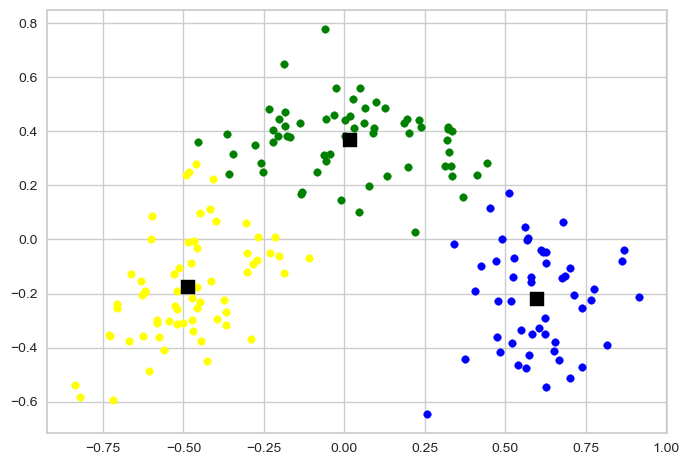

In [393]:
labels = [0, 1, 2]
colors = ["green", "blue", "yellow"]

for label, color in zip(labels, colors):
    index = pca_df["Cluster"]==label
    plt.scatter(pca_df.loc[index, "PC1"],
                pca_df.loc[index, "PC2"],
                c = color,
                s=30)
    
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color="black", marker="s", s=100);

After completing PCA, we were able to see the grouped data points according to their principle components (PC1 and PC2). Each cluster label (0, 1, and 2) is iterated over, and each cluster is given a unique color (green, blue, or yellow) to symbolize it.

The data points for each cluster are then plotted in the PC1-PC2 space. It also uses black squares to indicate the centroids of the clusters found by the KMeans method, giving the center of each cluster a distinct reference point.

This graphic provides insights into the underlying structure or patterns in the data by illustrating how the data points are organized into clusters according to their major components.

### Compare the best clustering solution labels with the original data labels in the column "wine".

In [394]:

# Check the clustering solution labels with the original data labels
comparison_df = pd.concat([df['Wine'], scaled_df['Cluster']], axis=1)

# Print the comparison DataFrame
comparison_df


,Wine,Cluster
0,1,2
1,1,2
2,1,2
3,1,2
4,1,2
...,...,...
173,3,1
174,3,1
175,3,1
176,3,1


We cannot compare the labels directly, as from the clustering solution and label index changes. So lets check contingency matrix to compare the original labels with the labels from k-means clustering.

In [395]:
## To compare original labels and k-means labels we will look at continegncy matrix

contingency_matrix(df['Wine'].values,scaled_df['Cluster'].values)

array([[ 0,  0, 59],
       [62,  7,  2],
       [ 0, 48,  0]], dtype=int64)

From the contingency matrix we can see that only 7+2 = 9 points fall under different cluster compared to the original dataset.
We, can say that our clustering solution is a good solution.

## Conclusion:

Based on our analysis of three different clustering models applied to the wine dataset, we have concluded that k-means clustering provides the most optimal solution. Here's a summary of our findings:

* Model 1: Utilizing k-means clustering, we obtained a silhouette score of 0.30. The optimal number of clusters, determined from the elbow plot, was three.
* Model 2: Agglomerative clustering yielded a silhouette score of 0.29. The optimal number of clusters = 3 and linkage method as 'ward', were chosen based on the dendrogram analysis.
* Model 3: DBSCAN clustering resulted in a silhouette score of 0.22. The epsilon parameter 0.55 was determined from the k-distance plot, and the minimum samples were set to d+1 i.e. 14 , where d represents the number of features.

Given that the silhouette score for k-means clustering surpassed that of the other models, we have selected it as the preferred clustering method. We conducted further analysis by plotting scatter plots for certain pairs of features and performing PCA to visualize the clusteing solution in 2D space.

Furthermore, we examined the contingency matrix, which revealed that only 9 points out of the entire dataset fell under different clusters compared to the original labels. This indicates a high level of agreement between the clustering solution and the true labels.

In conclusion, based on the silhouette score, visualizations, and contingency matrix analysis, we can confidently assert that the k-means clustering solution with three clusters provides an effective segmentation of the wine dataset.